<a href="https://colab.research.google.com/github/aghapygad336/MENA/blob/master/MENA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/My Drive/MENA/golbal.csv',encoding = "ISO-8859-1", engine = 'python', usecols=[1,2,3,8,10,19,20,21,22,26,27,29,35,41,71,84,100,101,103,135])
print(data.shape)
dataLabels=np.array(data.columns)
print(dataLabels)
MENA=[]
MENA=['Algeria', 'Bahrain', 'Djibouti',' Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan','Kuwait', 'Lebanon',' Libya', 'Malta',' Morocco', 'Oman',' Qatar', 'Saudi Arabia', 'Syria', 'Tunisia', 'United Arab Emirates', 'Palestine', 'Yemen','Ethiopia' ,' Sudan' ]

(181691, 19)
['iyear' 'imonth' 'iday' 'country_txt' 'region_txt' 'crit1' 'crit2'
 'crit3' 'doubtterr' 'success' 'suicide' 'attacktype1_txt' 'targtype1_txt'
 'natlty1_txt' 'claimed' 'weapsubtype1_txt' 'nkillter' 'nwound' 'nwoundte']


In [0]:
data_C=data.shape[1]
data_R=data.shape[0]


In [0]:
data_C=data.shape[1]
data_R=data.shape[0]
for c in range(data_C):
    Region_nums=[]
    Region_nums=data[dataLabels[c]].unique()
    Region_nums={Region_nums[i]: i for i in range(len(Region_nums))}
    Regions = Region_nums
    data[dataLabels[c]].replace(Regions, inplace=True)


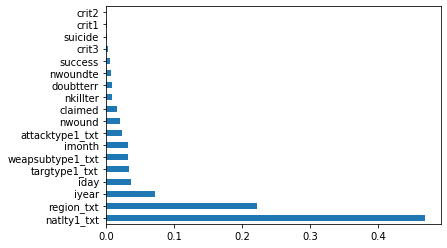

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

X =data
X = X[['iyear', 'imonth' ,'iday', 'country_txt' ,'region_txt' ,'crit1' ,'crit2',
 'crit3', 'doubtterr', 'success', 'suicide' ,'attacktype1_txt' ,'targtype1_txt',
 'natlty1_txt', 'claimed' ,'weapsubtype1_txt' ,'nkillter', 'nwound' ,'nwoundte']].dropna()
y = X.pop('country_txt')

model = RandomForestClassifier()
model.fit(X, y)

(pd.Series(model.feature_importances_, index=X.columns).nlargest(19).plot(kind='barh')) 

In [0]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook
import itertools
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#Initialization variables
X =data
X = X[['iyear', 'imonth' ,'iday', 'country_txt' ,'region_txt' ,'crit1' ,'crit2',
 'crit3', 'doubtterr', 'success', 'suicide' ,'attacktype1_txt' ,'targtype1_txt',
 'natlty1_txt', 'claimed' ,'weapsubtype1_txt' ,'nkillter', 'nwound' ,'nwoundte']].dropna()
Y = X.pop('country_txt')
k = 10
remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [38]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,11)])


Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['natlty1_txt'], 223595394.0),
 (2, ['natlty1_txt', 'iyear'], 212145147.0),
 (3, ['natlty1_txt', 'iyear', 'region_txt'], 211191002.0),
 (4, ['natlty1_txt', 'iyear', 'region_txt', 'suicide'], 210733531.0),
 (5,
  ['natlty1_txt', 'iyear', 'region_txt', 'suicide', 'claimed'],
  210254862.0),
 (6,
  ['natlty1_txt',
   'iyear',
   'region_txt',
   'suicide',
   'claimed',
   'weapsubtype1_txt'],
  209997011.0),
 (7,
  ['natlty1_txt',
   'iyear',
   'region_txt',
   'suicide',
   'claimed',
   'weapsubtype1_txt',
   'nwoundte'],
  209766416.0),
 (8,
  ['natlty1_txt',
   'iyear',
   'region_txt',
   'suicide',
   'claimed',
   'weapsubtype1_txt',
   'nwoundte',
   'doubtterr'],
  209556180.0),
 (9,
  ['natlty1_txt',
   'iyear',
   'region_txt',
   'suicide',
   'claimed',
   'weapsubtype1_txt',
   'nwoundte',
   'doubtterr',
   'nwound'],
  209341701.0),
 (10,
  ['natlty1_txt',
   'iyear',
   'region_txt',
   'suicide',
   'claimed',
   'weapsubtype1_txt',
   'nwoundte',
   'doubtterr',
